In [117]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plot data, visualizations
import seaborn as sns #visualization with seaborn
import scipy.stats as st
import warnings

from time import time
from pandas import Series
#ensemble classifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
#Classification and Regression Algorithms
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.svm import SVC, SVR
# split data into train and test dataset
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score # Model Evaluation

import sys
import os
#kaggle Data source
#print(os.listdir("../input"))
print(os.listdir("D:\DataScience@DKB\RandomF_NN_Hyperparameter")) # Files for analysis

['data_ausw_bi.csv', 'Einsteiger-Kurs_7.pdf', 'lettersdata.csv', 'skript.R']


In [13]:
#load data and print first 5 rows
#df = pd.read_csv('../input/lettersdata.csv', index_col=0)
df_c = pd.read_csv('D:\DataScience@DKB\RandomF_NN_Hyperparameter\lettersdata.csv', index_col=0)
print('Dataset Letters for Classification')
print(df_c.head(5))

df_r = pd.read_csv('D:\DataScience@DKB\RandomF_NN_Hyperparameter\data_ausw_bi.csv')
print('Dataset Auswertungen BI for Regression')
print(df_r.head(5))

Dataset Letters for Classification
  lettr  xbox  ybox  width  high  onpix  xbar  ybar  x2bar  y2bar  xybar  \
1     T     2     8      3     5      1     8    13      0      6      6   
2     I     5    12      3     7      2    10     5      5      4     13   
3     D     4    11      6     8      6    10     6      2      6     10   
4     N     7    11      6     6      3     5     9      4      6      4   
5     G     2     1      3     1      1     8     6      6      6      6   

   x2ybr  xy2br  xege  xegvy  yege  yegvx  
1     10      8     0      8     0      8  
2      3      9     2      8     4     10  
3      3      7     3      7     3      9  
4      4     10     6     10     2      8  
5      5      9     1      7     5     10  
Dataset Auswertungen BI for Regression
       Dauer  Zieldauer  Stufe  Art  werbe     kunde     daten  adresse  \
0   1.844444  10.257639      0    1    0.0  0.066667  0.133333      0.0   
1   2.988194  13.499306      1    1    0.0  0.027778  0

## Data Preparation

In [14]:
#select first two letters of name 'MALI'
#show data types
df_c.dtypes

#copy data to new df with selected rows

df_c1 = df_c.copy()

df_c1 = df_c1.loc[df_c1['lettr'].isin(['M','A','L','I'])]

print(df_c1.head(10))

   lettr  xbox  ybox  width  high  onpix  xbar  ybar  x2bar  y2bar  xybar  \
2      I     5    12      3     7      2    10     5      5      4     13   
8      A     1     1      3     2      1     8     2      2      2      8   
10     M    11    15     13     9      7    13     2      6      2     12   
14     M     6     9      8     6      9     7     8      6      5      7   
27     M     7    11     11     8      9     3     8      4      5     10   
31     L     2     3      3     4      1     0     1      5      6      0   
32     L     1     3      3     1      1     6     4      1      7      8   
35     M     6     9      9     7      6     5     6      3      5     10   
52     L     3     6      3     4      1     1     0      6      6      0   
60     L     5    10      6     8      5     9     3      2      6      9   

    x2ybr  xy2br  xege  xegvy  yege  yegvx  
2       3      9     2      8     4     10  
8       2      8     1      6     2      7  
10      1      9 

In [15]:
#show data types
df_r.dtypes

#copy data to new df with selected columns
df_r1 = df_r.copy()

df_r1 = df_r1[['Dauer','werbe','kunde','daten','adresse','pers','karte','cash','aktiv','konto','Zieldauer','Art']]

print(df_r1.head(5))

       Dauer  werbe     kunde     daten  adresse      pers     karte  \
0   1.844444    0.0  0.066667  0.133333      0.0  0.066667  0.000000   
1   2.988194    0.0  0.027778  0.000000      0.0  0.000000  0.027778   
2   1.972222    0.0  0.047619  0.000000      0.0  0.000000  0.000000   
3   7.944444    0.0  0.040000  0.000000      0.0  0.000000  0.000000   
4  13.022222    0.0  0.042254  0.000000      0.0  0.000000  0.000000   

       cash     aktiv     konto  Zieldauer  Art  
0  0.000000  0.000000  0.000000  10.257639    1  
1  0.055556  0.000000  0.055556  13.499306    1  
2  0.047619  0.047619  0.000000   4.513194    1  
3  0.000000  0.000000  0.000000  12.407639    1  
4  0.042254  0.000000  0.000000  19.520833    0  


In [17]:
#subset data in target (dependent variable) and dimensions (independent variabes) 
Xr = df_r1.drop(['Dauer'],axis=1)
Xc = df_c1.drop(['lettr'], axis=1)
print('Shape X ausw bi ', Xr.shape)
print('Shape X lettr ',Xc.shape)

yr = df_r1[['Dauer']]
yc = df_c1[['lettr']]
print('Shape y ausw bi ',yr.shape)
print('Shape y lettr ', yc.shape)

print('Dataset Auswertung BI for Regression')
print(Xr.head(2))
print(yr.head(2))

print('Dataset Letters for Classification')
print(Xc.head(2))
print(yc.head(2))

Shape X ausw bi  (115, 11)
Shape X lettr  (3097, 16)
Shape y ausw bi  (115, 1)
Shape y lettr  (3097, 1)
Dataset Auswertung BI for Regression
   werbe     kunde     daten  adresse      pers     karte      cash  aktiv  \
0    0.0  0.066667  0.133333      0.0  0.066667  0.000000  0.000000    0.0   
1    0.0  0.027778  0.000000      0.0  0.000000  0.027778  0.055556    0.0   

      konto  Zieldauer  Art  
0  0.000000  10.257639    1  
1  0.055556  13.499306    1  
      Dauer
0  1.844444
1  2.988194
Dataset Letters for Classification
   xbox  ybox  width  high  onpix  xbar  ybar  x2bar  y2bar  xybar  x2ybr  \
2     5    12      3     7      2    10     5      5      4     13      3   
8     1     1      3     2      1     8     2      2      2      8      2   

   xy2br  xege  xegvy  yege  yegvx  
2      9     2      8     4     10  
8      8     1      6     2      7  
  lettr
2     I
8     A


## Regression Analysis on Dataset 'Auswertung BI'

In [33]:
#set seed
seed = 47
#divide data into train and test (scikit-learn function train_test_split)
Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr, yr, 
                                                    test_size = 0.3, #Testsize
                                                    random_state = seed) 

print(Xr_train.head(1))
print(Xr_test.head(1))
print(yr_train.head(1))
print(yr_test.head(1))

#print(yr_train.shape)

    werbe  kunde  daten  adresse  pers  karte  cash  aktiv  konto  Zieldauer  \
97    0.0   0.08   0.04      0.0   0.0    0.0   0.0    0.0    0.0      6.625   

    Art  
97    0  
    werbe     kunde     daten  adresse  pers  karte  cash  aktiv  konto  \
39    0.0  0.066667  0.066667      0.0   0.0    0.0   0.0    0.0    0.0   

    Zieldauer  Art  
39   6.528472    1  
        Dauer
97  13.007639
        Dauer
39  45.104167
(80, 1)


### Linear, Lasso and Ridge Regression

In [22]:
#Linear (multivariate) Regression
lm = LinearRegression()
#train model
lm.fit(Xr_train, yr_train)
#Lasso Regression
ls = Lasso(alpha=0.1)
#train model
ls.fit(Xr_train, yr_train)
#Ridge Regression
lr = Ridge(alpha=1.0)
#train linear model
lr.fit(Xr_train, yr_train)



Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [25]:
#Predict y on test data
y_pred = lm.predict(Xr_test)
#print(y_pred)
y_pred_ls = ls.predict(Xr_test)

y_pred_lr = lr.predict(Xr_test)


In [26]:
#Model Evaluation
#MSE
print('-----------------------------------------------')
print('Model Evaluation')
print('-----------------------------------------------')
print('++++Linear Regression++++')
print('-----------------------------------------------')
print('Mean Squared Error')
print('-----------------------------------------------')
print('MSE lm:', mean_squared_error(yr_test, y_pred))
print('-----------------------------------------------')
print('Root Mean Squared Error')
print('-----------------------------------------------')
print('RMSE lm:',np.sqrt(mean_squared_error(yr_test, y_pred)))
print('-----------------------------------------------')

print('++++Lasso Regression++++')
print('-----------------------------------------------')
print('Mean Squared Error')
print('-----------------------------------------------')
print('MSE ls:', mean_squared_error(yr_test, y_pred_ls))
print('-----------------------------------------------')
print('Root Mean Squared Error')
print('-----------------------------------------------')
print('RMSE ls:',np.sqrt(mean_squared_error(yr_test, y_pred_ls)))
print('-----------------------------------------------')

print('++++Ridge Regression++++')
print('-----------------------------------------------')
print('Mean Squared Error')
print('-----------------------------------------------')
print('MSE lr:', mean_squared_error(yr_test, y_pred_lr))
print('-----------------------------------------------')
print('Root Mean Squared Error')
print('-----------------------------------------------')
print('RMSE lr:',np.sqrt(mean_squared_error(yr_test, y_pred_lr)))
print('-----------------------------------------------')

-----------------------------------------------
Model Evaluation
-----------------------------------------------
++++Linear Regression++++
-----------------------------------------------
Mean Squared Error
-----------------------------------------------
MSE lm: 429.1505287075861
-----------------------------------------------
Root Mean Squared Error
-----------------------------------------------
RMSE lm: 20.71594865574797
-----------------------------------------------
++++Lasso Regression++++
-----------------------------------------------
Mean Squared Error
-----------------------------------------------
MSE ls: 396.5500564213089
-----------------------------------------------
Root Mean Squared Error
-----------------------------------------------
RMSE ls: 19.91356463371912
-----------------------------------------------
++++Ridge Regression++++
-----------------------------------------------
Mean Squared Error
-----------------------------------------------
MSE lr: 387.818629503963

### Neural Network

In [148]:
#neural network (MLPRegressor with default parameters)
mlp = MLPRegressor(random_state=seed)

#train model
mlp.fit(Xr_train, yr_train.values.ravel())

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=47, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [46]:
#Predict y on test data
y_pred_mlp = mlp.predict(Xr_test)
print(y_pred_mlp)

[11.29750954 10.93838497 11.33336944 18.24221848  4.99190685 15.93094766
 23.37480029 11.05806615 34.30131199  9.98573525 11.62257892 22.96885414
  4.86580647 24.29523279  8.61307743 12.24401912  8.47049057 11.34472857
 19.71804311  0.53430415 19.74368506 19.51946506 22.97370416 76.38566415
 49.73349301 11.49366182 21.83652016  7.46606637 28.10991236 29.10916941
 32.842324   34.21466018  3.51649683 17.14617559 18.64742103]


In [102]:
print('++++Neural Network++++')
print('-----------------------------------------------')
print('Mean Squared Error')
print('-----------------------------------------------')
print('MSE mlp:', mean_squared_error(yr_test, y_pred_mlp))
print('-----------------------------------------------')
print('Root Mean Squared Error')
print('-----------------------------------------------')
print('RMSE mlp:',np.sqrt(mean_squared_error(yr_test, y_pred_mlp)))
print('-----------------------------------------------')

++++Neural Network++++
-----------------------------------------------
Mean Squared Error
-----------------------------------------------
MSE mlp: 443.3670342851078
-----------------------------------------------
Root Mean Squared Error
-----------------------------------------------
RMSE mlp: 21.056282537169466
-----------------------------------------------


### Random Forest

In [149]:
#random forest (with default parameters)
rfr = RandomForestRegressor(random_state=seed)

#train model
rfr.fit(Xr_train, yr_train.values.ravel())

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=47, verbose=0, warm_start=False)

In [54]:
#Predict y on test data
y_pred_rfr = rfr.predict(Xr_test)
print(y_pred_rfr)

[33.85395833 29.58305556 37.54763889 36.51416667  2.36798611 26.12506944
 45.039375   32.78       49.88048611 39.17444444 23.71479167 30.29027778
  3.55055556 33.92076389 31.72138889 28.90138889 13.68736111 29.12326389
 30.39076389 14.40645833 15.77291667 36.23402778 10.91055556 21.57326389
 20.21361111 51.92673611 45.34993056  8.09763889 24.47298611 35.77569444
 26.85986111 38.36555556  0.82826389 37.07541667 21.98006944]


In [103]:
print('++++Random Forest++++')
print('-----------------------------------------------')
print('Mean Squared Error')
print('-----------------------------------------------')
print('MSE rfr:', mean_squared_error(yr_test, y_pred_rfr))
print('-----------------------------------------------')
print('Root Mean Squared Error')
print('-----------------------------------------------')
print('RMSE rfr:',np.sqrt(mean_squared_error(yr_test, y_pred_rfr)))
print('-----------------------------------------------')

++++Random Forest++++
-----------------------------------------------
Mean Squared Error
-----------------------------------------------
MSE rfr: 460.4571943430334
-----------------------------------------------
Root Mean Squared Error
-----------------------------------------------
RMSE rfr: 21.45826634057452
-----------------------------------------------


### SVM

In [151]:
#svm (with default parameters)
svm_r = SVR()

#train model
svm_r.fit(Xr_train, yr_train.values.ravel())

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [60]:
#Predict y on test data
y_pred_svr = svm_r.predict(Xr_test)
print(y_pred_svr)

[27.29312138 27.15783315 27.15646224 32.14092374 25.31720254 30.35188651
 30.63326881 27.23339311 30.95427313 27.30422889 27.41054341 30.65834745
 24.68237014 30.654915   26.16997413 28.14752191 24.9829873  27.4056232
 32.24773729 27.1779896  32.2434562  32.25652467 30.94291436 31.98605438
 31.75686697 27.31455477 31.18182513 24.61293496 31.61838724 31.41835206
 30.47113326 30.95024654 26.22031056 31.30979472 32.14071203]


In [104]:
print('++++SVM++++')
print('-----------------------------------------------')
print('Mean Squared Error')
print('-----------------------------------------------')
print('MSE svr:', mean_squared_error(yr_test, y_pred_svr))
print('-----------------------------------------------')
print('Root Mean Squared Error')
print('-----------------------------------------------')
print('RMSE svr:',np.sqrt(mean_squared_error(yr_test, y_pred_svr)))
print('-----------------------------------------------')

++++SVM++++
-----------------------------------------------
Mean Squared Error
-----------------------------------------------
MSE svr: 441.99998250105006
-----------------------------------------------
Root Mean Squared Error
-----------------------------------------------
RMSE svr: 21.02379562545855
-----------------------------------------------


## Hyperparamter Selection

In [92]:
#create folds (10) for CV
Kf = KFold(n_splits=10, random_state=seed)
print(Kf)

KFold(n_splits=10, random_state=47, shuffle=False)


In [64]:
#Function to print the 3 best solutions (from scikit-learn.org)
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [130]:
#create dicts with parameters for RF, NN, SVM

param_dist_rf = {
                'n_estimators'          : st.randint(200, 1000),
                'max_features'          : ['auto','sqrt','log2'],
                'max_depth'             : st.randint(2, 100),
                'min_samples_split'     : st.randint(2, 100),
                'min_samples_leaf'      : st.randint(2, 100),
                'criterion'             : ['mse', 'mae'],
                'min_impurity_decrease' : st.randint(0, 2)}

param_dist_nn = {
                'hidden_layer_sizes'    : st.randint(2, 150),
                'activation'            : ['logistic','tanh','relu'],
                'solver'                : ['adam','lbfgs','sgd'],
                'learning_rate'         : ['constant','invscaling','adaptive'],
                'learning_rate_init'    : st.uniform(0.001, 0.01)
                }

param_dist_svm = {
                 'C'                    : st.uniform(0.5, 2.0),
                 'epsilon'              : st.uniform(0.1, 0.5),
                 'kernel'               : ['rbf','poly','linear']
                 }

In [133]:
#randomized search RF
n_iter_search = 20
random_search_rf = RandomizedSearchCV(rfr, param_distributions=param_dist_rf, 
                                   n_iter=n_iter_search, cv=Kf, random_state=seed)

#randomized search NN
n_iter_search = 20
random_search_nn = RandomizedSearchCV(mlp, param_distributions=param_dist_nn, 
                                   n_iter=n_iter_search, cv=Kf, random_state=seed)

#randomized search SVM
n_iter_search = 20
random_search_svm = RandomizedSearchCV(svm_r, param_distributions=param_dist_svm, 
                                   n_iter=n_iter_search, cv=Kf, random_state=seed)


In [135]:
#Random Forest
start = time()
random_search_rf.fit(Xr_train, yr_train.values.ravel())
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)

print('++++Best Model: Random Forest++++')
print('Best Parameters', random_search_rf.best_params_)
print('Best Score', random_search_rf.best_score_)

print('----------------------------------------')

#Neural Network
#ignore convergence warning for max_iter=200
warnings.filterwarnings("ignore", category=UserWarning)
random_search_nn.fit(Xr_train, yr_train.values.ravel())
print('++++Best Model: Neural Network++++')
print('Best Parameters', random_search_nn.best_params_)
print('Best Score', random_search_nn.best_score_)

print('----------------------------------------')

#SVM
random_search_svm.fit(Xr_train, yr_train.values.ravel())
print('++++Best Model: SVM++++')
print('Best Parameters', random_search_svm.best_params_)
print('Best Score', random_search_svm.best_score_)


RandomizedSearchCV took 96.61 seconds for 20 candidates parameter settings.
Model with rank: 1
Mean validation score: -0.397 (std: 0.455)
Parameters: {'criterion': 'mae', 'max_depth': 82, 'max_features': 'sqrt', 'min_impurity_decrease': 1, 'min_samples_leaf': 57, 'min_samples_split': 52, 'n_estimators': 930}

Model with rank: 2
Mean validation score: -0.399 (std: 0.471)
Parameters: {'criterion': 'mae', 'max_depth': 60, 'max_features': 'auto', 'min_impurity_decrease': 1, 'min_samples_leaf': 24, 'min_samples_split': 21, 'n_estimators': 485}

Model with rank: 3
Mean validation score: -0.401 (std: 0.461)
Parameters: {'criterion': 'mae', 'max_depth': 97, 'max_features': 'log2', 'min_impurity_decrease': 0, 'min_samples_leaf': 35, 'min_samples_split': 58, 'n_estimators': 684}

++++Best Model: Random Forest++++
Best Parameters {'criterion': 'mae', 'max_depth': 83, 'max_features': 'auto', 'min_impurity_decrease': 1, 'min_samples_leaf': 54, 'min_samples_split': 11, 'n_estimators': 926}
Best Scor

### RF, NN, SVM with Hyperparameter Tuning

In [138]:
#neural network (MLPRegressor with selected best model parameters)
mlp_hp = MLPRegressor(**random_search_nn.best_params_)

#train model
mlp_hp.fit(Xr_train, yr_train.values.ravel())



MLPRegressor(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=88, learning_rate='invscaling',
       learning_rate_init=0.0016303873194121812, max_iter=200,
       momentum=0.9, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [139]:
#Predict y on test data
y_pred_mlp_hp = mlp_hp.predict(Xr_test)
#print(y_pred_mlp_hp)

In [141]:
#random forest (with selected best model parameters)
rfr_hp = RandomForestRegressor(**random_search_rf.best_params_)

#train model
rfr_hp.fit(Xr_train, yr_train.values.ravel())

RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=83,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=1, min_impurity_split=None,
           min_samples_leaf=54, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=926, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [142]:
#Predict y on test data
y_pred_rfr_hp = rfr_hp.predict(Xr_test)
#print(y_pred_rfr)

In [143]:
#svm (with selected best model parameters)
svm_r_hp = SVR(**random_search_svm.best_params_)

#train model
svm_r_hp.fit(Xr_train, yr_train.values.ravel())

SVR(C=2.38451194529459, cache_size=200, coef0=0.0, degree=3,
  epsilon=0.4724726488849802, gamma='auto', kernel='linear', max_iter=-1,
  shrinking=True, tol=0.001, verbose=False)

In [144]:
#Predict y on test data
y_pred_svr_hp = svm_r_hp.predict(Xr_test)
#print(y_pred_svr)

In [146]:
#Model Evaluation Compare

print('++++Neural Network++++')
print('-----------------------------------------------')
print('Mean Squared Error')
print('-----------------------------------------------')
print('MSE mlp:', mean_squared_error(yr_test, y_pred_mlp))
print('MSE mlp_hp:', mean_squared_error(yr_test, y_pred_mlp_hp))
print('-----------------------------------------------')
print('Root Mean Squared Error')
print('-----------------------------------------------')
print('RMSE mlp:',np.sqrt(mean_squared_error(yr_test, y_pred_mlp)))
print('RMSE mlp_hp:',np.sqrt(mean_squared_error(yr_test, y_pred_mlp_hp)))
print('-----------------------------------------------')

print('++++Random Forest++++')
print('-----------------------------------------------')
print('Mean Squared Error')
print('-----------------------------------------------')
print('MSE rfr:', mean_squared_error(yr_test, y_pred_rfr))
print('MSE rfr_hp:', mean_squared_error(yr_test, y_pred_rfr_hp))
print('-----------------------------------------------')
print('Root Mean Squared Error')
print('-----------------------------------------------')
print('RMSE rfr:',np.sqrt(mean_squared_error(yr_test, y_pred_rfr)))
print('RMSE rfr_hp:',np.sqrt(mean_squared_error(yr_test, y_pred_rfr_hp)))
print('-----------------------------------------------')

print('++++SVM++++')
print('-----------------------------------------------')
print('Mean Squared Error')
print('-----------------------------------------------')
print('MSE svr:', mean_squared_error(yr_test, y_pred_svr))
print('MSE svr_hp:', mean_squared_error(yr_test, y_pred_svr_hp))
print('-----------------------------------------------')
print('Root Mean Squared Error')
print('-----------------------------------------------')
print('RMSE svr:',np.sqrt(mean_squared_error(yr_test, y_pred_svr)))
print('RMSE svr_hp:',np.sqrt(mean_squared_error(yr_test, y_pred_svr_hp)))
print('-----------------------------------------------')

++++Neural Network++++
-----------------------------------------------
Mean Squared Error
-----------------------------------------------
MSE mlp: 443.3670342851078
MSE mlp_hp: 411.59886347284345
-----------------------------------------------
Root Mean Squared Error
-----------------------------------------------
RMSE mlp: 21.056282537169466
RMSE mlp_hp: 20.28789943470845
-----------------------------------------------
++++Random Forest++++
-----------------------------------------------
Mean Squared Error
-----------------------------------------------
MSE rfr: 460.4571943430334
MSE rfr_hp: 466.8995287884615
-----------------------------------------------
Root Mean Squared Error
-----------------------------------------------
RMSE rfr: 21.45826634057452
RMSE rfr_hp: 21.607858033328096
-----------------------------------------------
++++SVM++++
-----------------------------------------------
Mean Squared Error
-----------------------------------------------
MSE svr: 441.99998250105006

## Classification Analysis on Dataset 'Letters'

In [147]:
#divide data into train and test (scikit-learn function train_test_split)
Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, yc, 
                                                    test_size = 0.3, #Testsize
                                                    random_state = seed) 

print(Xc_train.head(1))
print(Xc_test.head(1))
print(yc_train.head(1))
print(yc_test.head(1))

#print(yr_train.shape)

       xbox  ybox  width  high  onpix  xbar  ybar  x2bar  y2bar  xybar  x2ybr  \
14967     5     9      8     7      8     8     7      6      5      6      7   

       xy2br  xege  xegvy  yege  yegvx  
14967      8     8      6     2      8  
       xbox  ybox  width  high  onpix  xbar  ybar  x2bar  y2bar  xybar  x2ybr  \
12186     1    11      0     8      0     7     7      4      4      7      6   

       xy2br  xege  xegvy  yege  yegvx  
12186      8     0      8     0      8  
      lettr
14967     M
      lettr
12186     I


LogisticRegression 0.9698924731182795


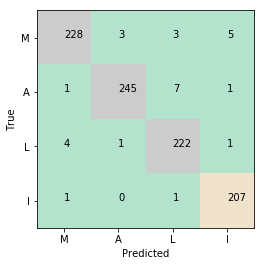

RandomForestClassifier 0.986021505376344


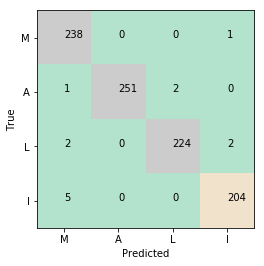

SVC 0.9989247311827957


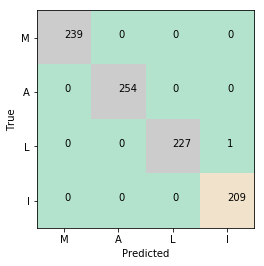

MLPClassifier 0.9881720430107527


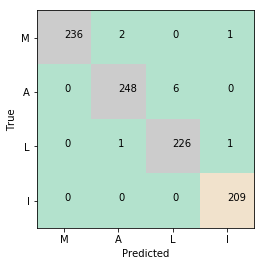

In [153]:
#train and evaluate models (rf, lr, svm, nn)
lr_clf = LogisticRegression(random_state=seed)
rf_clf = RandomForestClassifier(random_state=seed)
svm_clf = SVC(random_state=seed)
mlp_clf = MLPClassifier(random_state=seed)

for clf in (lr_clf, rf_clf, svm_clf, mlp_clf):
    clf.fit(Xc_train, yc_train)
    yc_pred = clf.predict(Xc_test)
    print(clf.__class__.__name__, accuracy_score(yc_test, yc_pred))
    #print(confusion_matrix(y_test, y_pred))
    cm = confusion_matrix(yc_test, yc_pred)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel2)
    classNames = ['M','A','L','I']
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames)
    plt.yticks(tick_marks, classNames)
    plt.ylabel('True')
    plt.xlabel('Predicted')
    for i in range(4):
        for j in range(4):
            plt.text(j, i, str(cm[i][j]))
    plt.show()



### Hyperparameter Selection (Classification)

In [162]:
#create dicts with parameters for RF, NN, SVM

param_dist_rf_clf = {
                'n_estimators'          : st.randint(200, 1000),
                'max_features'          : ['auto','sqrt','log2'],
                'max_depth'             : st.randint(2, 100),
                'min_samples_split'     : st.randint(2, 100),
                'min_samples_leaf'      : st.randint(2, 100),
                'criterion'             : ['gini', 'entropy'],
                'min_impurity_decrease' : st.randint(0, 2)}

param_dist_nn_clf = {
                'hidden_layer_sizes'    : st.randint(2, 150),
                'activation'            : ['logistic','tanh','relu'],
                'solver'                : ['adam','lbfgs','sgd'],
                'learning_rate'         : ['constant','invscaling','adaptive'],
                'learning_rate_init'    : st.uniform(0.001, 0.01)
                }

param_dist_svm_clf = {
                 'C'                    : st.uniform(0.5, 2.0),
                 'kernel'               : ['rbf','poly','linear']
                 }

In [163]:
#randomized search RF
n_iter_search = 20
random_search_rf_clf = RandomizedSearchCV(rf_clf, param_distributions=param_dist_rf_clf, 
                                   n_iter=n_iter_search, cv=Kf, random_state=seed)

#randomized search NN
n_iter_search = 20
random_search_nn_clf = RandomizedSearchCV(mlp_clf, param_distributions=param_dist_nn_clf, 
                                   n_iter=n_iter_search, cv=Kf, random_state=seed)

#randomized search SVM
n_iter_search = 20
random_search_svm_clf = RandomizedSearchCV(svm_clf, param_distributions=param_dist_svm_clf, 
                                   n_iter=n_iter_search, cv=Kf, random_state=seed)


In [164]:
#Random Forest
start = time()
random_search_rf_clf.fit(Xc_train, yc_train)

print('++++Best Model: Random Forest++++')
print('Best Parameters', random_search_rf_clf.best_params_)
print('Best Score', random_search_rf_clf.best_score_)

print('----------------------------------------')

#Neural Network
#ignore convergence warning for max_iter=200
warnings.filterwarnings("ignore", category=UserWarning)
random_search_nn_clf.fit(Xc_train, yc_train)
print('++++Best Model: Neural Network++++')
print('Best Parameters', random_search_nn_clf.best_params_)
print('Best Score', random_search_nn_clf.best_score_)

print('----------------------------------------')

#SVM
random_search_svm_clf.fit(Xc_train, yc_train)
print('++++Best Model: SVM++++')
print('Best Parameters', random_search_svm_clf.best_params_)
print('Best Score', random_search_svm_clf.best_score_)

++++Best Model: Random Forest++++
Best Parameters {'criterion': 'gini', 'max_depth': 77, 'max_features': 'log2', 'min_impurity_decrease': 0, 'min_samples_leaf': 18, 'min_samples_split': 61, 'n_estimators': 227}
Best Score 0.957544993077988
----------------------------------------
++++Best Model: Neural Network++++
Best Parameters {'activation': 'tanh', 'hidden_layer_sizes': 88, 'learning_rate': 'invscaling', 'learning_rate_init': 0.0016303873194121812, 'solver': 'adam'}
Best Score 0.9898477157360406
----------------------------------------
++++Best Model: SVM++++
Best Parameters {'C': 1.9574692670022125, 'kernel': 'rbf'}
Best Score 0.9995385325334564


### RF, NN, SVM with Hyperparameter Tuning

In [170]:
#neural network (MLPClassifier with selected best model parameters)
mlp_clf_hp = MLPClassifier(**random_search_nn_clf.best_params_)

#train model
mlp_clf_hp.fit(Xc_train, yc_train)


MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=88, learning_rate='invscaling',
       learning_rate_init=0.0016303873194121812, max_iter=200,
       momentum=0.9, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [171]:
#Predict y on test data
y_pred_mlp_clf_hp = mlp_clf_hp.predict(Xc_test)
#print(y_pred_mlp_hp)

In [172]:
#random forest (with selected best model parameters)
rfr_clf_hp = RandomForestClassifier(**random_search_rf_clf.best_params_)

#train model
rfr_clf_hp.fit(Xc_train, yc_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=77, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0, min_impurity_split=None,
            min_samples_leaf=18, min_samples_split=61,
            min_weight_fraction_leaf=0.0, n_estimators=227, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [173]:
#Predict y on test data
y_pred_rfr_clf_hp = rfr_clf_hp.predict(Xc_test)
#print(y_pred_rfr)

In [174]:
#svm (with selected best model parameters)
svm_clf_hp = SVC(**random_search_svm_clf.best_params_)

#train model
svm_clf_hp.fit(Xc_train, yc_train)

SVC(C=1.9574692670022125, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [175]:
#Predict y on test data
y_pred_svc_hp = svm_clf_hp.predict(Xc_test)
#print(y_pred_svr)

LogisticRegression 0.9698924731182795


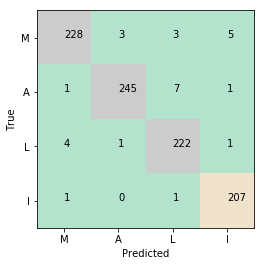

RandomForestClassifier 0.964516129032258


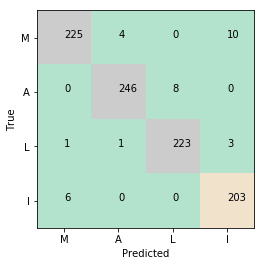

SVC 0.9989247311827957


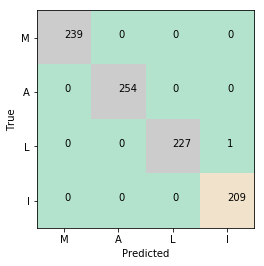

MLPClassifier 0.9924731182795699


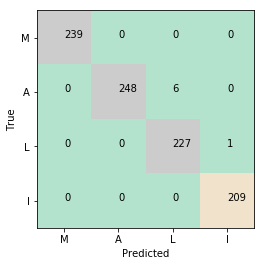

In [177]:
for clf in (lr_clf, rfr_clf_hp, svm_clf_hp, mlp_clf_hp):
    clf.fit(Xc_train, yc_train)
    yc_pred = clf.predict(Xc_test)
    print(clf.__class__.__name__, accuracy_score(yc_test, yc_pred))
    #print(confusion_matrix(y_test, y_pred))
    cm = confusion_matrix(yc_test, yc_pred)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel2)
    classNames = ['M','A','L','I']
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames)
    plt.yticks(tick_marks, classNames)
    plt.ylabel('True')
    plt.xlabel('Predicted')
    for i in range(4):
        for j in range(4):
            plt.text(j, i, str(cm[i][j]))
    plt.show()
